<a href="https://colab.research.google.com/github/mr-cri-spy/Deep-Learning-projects/blob/main/Trafic_Sighn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Traffic Sign Recognition using Deep Learning (ATSR Net)
   This project is a from scratch deep learning system for recognizing
   traffic signs using a custom CNN with an Attention mechanism. It is
   designed to be easy to use, collaborative, and fully runnable on Google
   Colab without any manual dataset setup.The main goal of this project is
   to show how modern deep learning models can help in real world applications
   like autonomous driving, smart transportation systems, and road safety.

This project uses a custom network called ATSR Net (Attention based Traffic Sign Recognition Network.
It consists of
Convolutional layers for feature extraction
Max pooling for dimensionality reduction
A Spatial Attention module to focus on important regions
Fully connected layers for classification
The attention mechanism helps the model focus on the traffic sign area, ignoring background noise.
 Dataset
I use the German Traffic Sign Recognition Benchmark (GTSRB) dataset.
No manual download is needed  the dataset is automatically fetched using PyTorch.

Run all cells step-by-step
The dataset will download automatically
Training will begin
Accuracy and predictions will be displayed
You can test on your own images

You can save the trained model and reload it anytime for inference or further training.

This system can be useful for:Autonomous vehiclesm Driver assistance systems Smart traffic monitoring Road safety automation AI based transportation systems

Built with passion by a deep learning enthusiast
If you like this project, feel free to star, fork , and contribute

In [30]:
!pip install torch torchvision matplotlib tqdm

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm


In [6]:
class SpatialAttention(nn.Module):
    def __init__(self):
        super(SpatialAttention, self).__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size=7, padding=3)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x = torch.cat([avg_out, max_out], dim=1)
        x = self.conv(x)
        return self.sigmoid(x)


In [7]:
class ATSRNet(nn.Module):
    def __init__(self, num_classes=43):
        super(ATSRNet, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        self.attention = SpatialAttention()

        self.classifier = nn.Sequential(
            nn.Linear(128 * 4 * 4, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        attn = self.attention(x)
        x = x * attn
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x


In [8]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2),
    transforms.ToTensor(),
])

train_data = datasets.GTSRB(
    root="./data",
    split="train",
    download=True,
    transform=transform
)

test_data = datasets.GTSRB(
    root="./data",
    split="test",
    download=True,
    transform=transform
)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)


100%|██████████| 187M/187M [00:12<00:00, 14.6MB/s]
100%|██████████| 89.0M/89.0M [00:07<00:00, 12.6MB/s]
100%|██████████| 99.6k/99.6k [00:00<00:00, 211kB/s]


In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ATSRNet(num_classes=43).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [10]:
def train(model, loader):
    model.train()
    total_loss = 0

    for images, labels in tqdm(loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(loader)


In [11]:
def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return 100 * correct / total


In [12]:
epochs = 10

for epoch in range(epochs):
    loss = train(model, train_loader)
    acc = evaluate(model, test_loader)
    print(f"Epoch {epoch+1} | Loss: {loss:.4f} | Accuracy: {acc:.2f}%")


100%|██████████| 417/417 [00:23<00:00, 18.07it/s]


Epoch 1 | Loss: 2.8281 | Accuracy: 40.65%


100%|██████████| 417/417 [00:17<00:00, 23.88it/s]


Epoch 2 | Loss: 1.4653 | Accuracy: 58.41%


100%|██████████| 417/417 [00:18<00:00, 23.04it/s]


Epoch 3 | Loss: 0.8201 | Accuracy: 74.56%


100%|██████████| 417/417 [00:16<00:00, 25.00it/s]


Epoch 4 | Loss: 0.4758 | Accuracy: 82.51%


100%|██████████| 417/417 [00:16<00:00, 25.10it/s]


Epoch 5 | Loss: 0.3208 | Accuracy: 85.92%


100%|██████████| 417/417 [00:16<00:00, 25.14it/s]


Epoch 6 | Loss: 0.2390 | Accuracy: 86.75%


100%|██████████| 417/417 [00:16<00:00, 25.15it/s]


Epoch 7 | Loss: 0.1940 | Accuracy: 88.46%


100%|██████████| 417/417 [00:17<00:00, 23.56it/s]


Epoch 8 | Loss: 0.1591 | Accuracy: 88.46%


100%|██████████| 417/417 [00:16<00:00, 25.17it/s]


Epoch 9 | Loss: 0.1315 | Accuracy: 89.30%


100%|██████████| 417/417 [00:23<00:00, 18.04it/s]


Epoch 10 | Loss: 0.1132 | Accuracy: 89.31%


In [13]:
import random
import numpy as np


In [14]:
def show_prediction(model, dataset):
    model.eval()
    idx = random.randint(0, len(dataset)-1)
    image, label = dataset[idx]

    with torch.no_grad():
        input_img = image.unsqueeze(0).to(device)
        output = model(input_img)
        _, pred = torch.max(output, 1)

    plt.imshow(image.permute(1, 2, 0))
    plt.title(f"True: {label}, Predicted: {pred.item()}")
    plt.axis("off")
    plt.show()


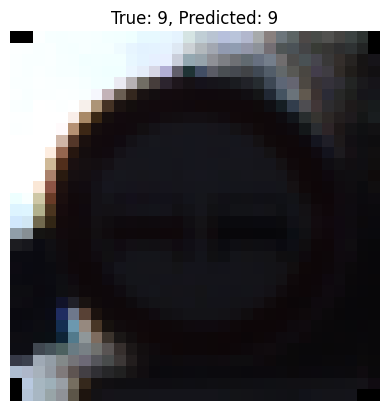

In [15]:
show_prediction(model, test_data)


In [16]:
def show_batch_predictions(model, loader):
    model.eval()
    images, labels = next(iter(loader))
    images, labels = images.to(device), labels.to(device)

    with torch.no_grad():
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

    plt.figure(figsize=(12, 8))
    for i in range(8):
        plt.subplot(2, 4, i+1)
        plt.imshow(images[i].cpu().permute(1,2,0))
        plt.title(f"T:{labels[i].item()} P:{preds[i].item()}")
        plt.axis("off")

    plt.show()


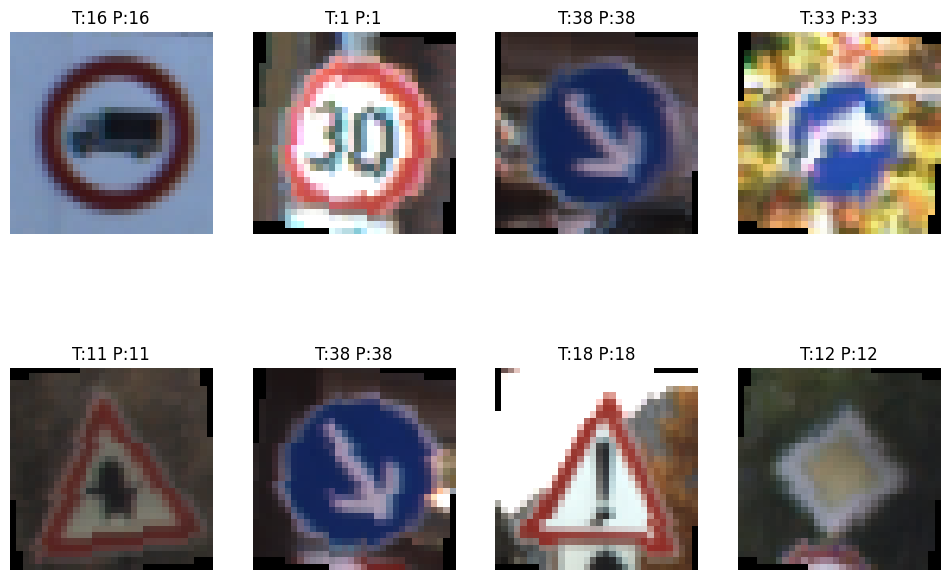

In [18]:
show_batch_predictions(model, test_loader)


In [19]:
torch.save(model.state_dict(), "traffic_sign_model.pth")
print("Model saved!")


Model saved!


In [20]:
model = ATSRNet(num_classes=43).to(device)
model.load_state_dict(torch.load("traffic_sign_model.pth"))
model.eval()
print("Model loaded!")


Model loaded!


In [21]:
acc = evaluate(model, test_loader)
print("Test Accuracy:", acc)


Test Accuracy: 89.30324623911322


In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [23]:
def plot_confusion_matrix(model, loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()


In [24]:
def plot_confusion_matrix(model, loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()


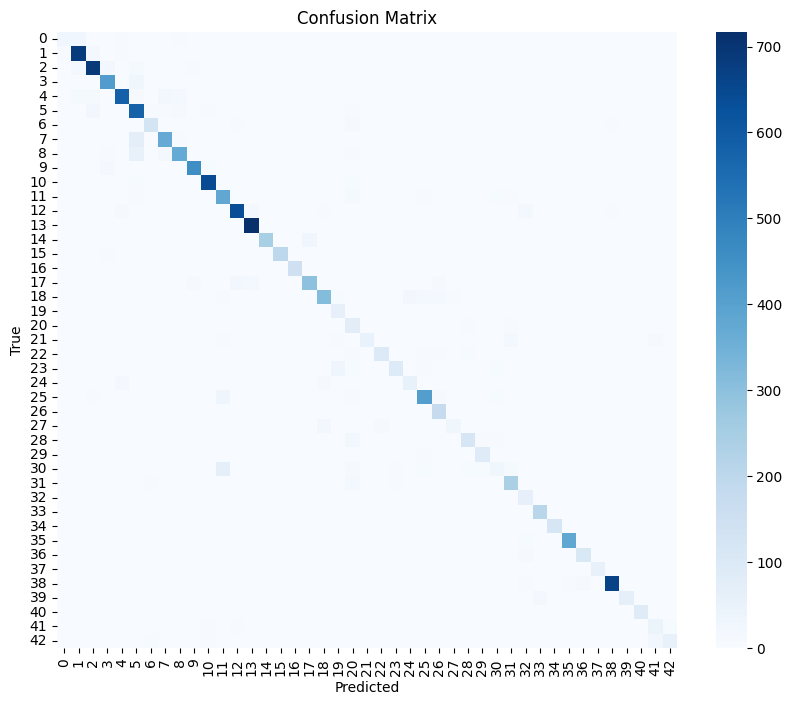

In [25]:
plot_confusion_matrix(model, test_loader)


In [26]:
from google.colab import files
uploaded = files.upload()


Saving sigh trafic to sigh trafic (1)


In [27]:
from PIL import Image

def predict_custom_image(img_path):
    img = Image.open(img_path).convert("RGB")
    img = transform(img)
    img = img.unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(img)
        _, pred = torch.max(output, 1)

    plt.imshow(img[0].cpu().permute(1,2,0))
    plt.title(f"Predicted: {pred.item()}")
    plt.axis("off")
    plt.show()


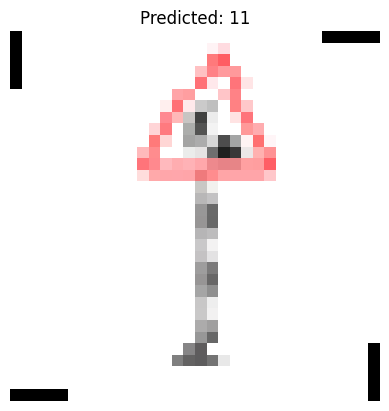

In [29]:
predict_custom_image("sigh trafic (1)")